# CLIP Interrogator 2.2 by [@pharmapsychotic](https://twitter.com/pharmapsychotic) 

Want to figure out what a good prompt might be to create new images like an existing one? The CLIP Interrogator is here to get you answers!

<br>

For Stable Diffusion 1.X choose the **ViT-L** model and for Stable Diffusion 2.0+ choose the **ViT-H** CLIP Model.

This version is specialized for producing nice prompts for use with Stable Diffusion and achieves higher alignment between generated text prompt and source image. You can try out the old [version 1](https://colab.research.google.com/github/pharmapsychotic/clip-interrogator/blob/v1/clip_interrogator.ipynb) to see how different CLIP models ranks terms. 

You can also run this on HuggingFace and Replicate<br>
[![Generic badge](https://img.shields.io/badge/🤗-Open%20in%20Spaces-blue.svg)](https://huggingface.co/spaces/pharma/CLIP-Interrogator) [![Replicate](https://replicate.com/pharmapsychotic/clip-interrogator/badge)](https://replicate.com/pharmapsychotic/clip-interrogator)

<br>

If this notebook is helpful to you please consider buying me a coffee via [ko-fi](https://ko-fi.com/pharmapsychotic) or following me on [twitter](https://twitter.com/pharmapsychotic) for more cool Ai stuff. 🙂

And if you're looking for more Ai art tools check out my [Ai generative art tools list](https://pharmapsychotic.com/tools.html).


In [1]:
#@title Check GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-60c08c7d-df14-6d36-f54d-f66d1f1a0b22)


In [2]:
#@title Setup
import os, subprocess

def setup():
    install_cmds = [
        ['pip', 'install', 'gradio'],
        ['pip', 'install', 'open_clip_torch'],
        ['pip', 'install', 'clip-interrogator'],
        ['pip', 'install', 'git+https://github.com/pharmapsychotic/BLIP.git'],
    ]
    for cmd in install_cmds:
        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

setup()


clip_model_name = 'ViT-L-14/openai' #@param ["ViT-L-14/openai", "ViT-H-14/laion2b_s32b_b79k"]


print("Download preprocessed cache files...")
CACHE_URLS = [
    'https://huggingface.co/pharma/ci-preprocess/resolve/main/ViT-L-14_openai_artists.pkl',
    'https://huggingface.co/pharma/ci-preprocess/resolve/main/ViT-L-14_openai_flavors.pkl',
    'https://huggingface.co/pharma/ci-preprocess/resolve/main/ViT-L-14_openai_mediums.pkl',
    'https://huggingface.co/pharma/ci-preprocess/resolve/main/ViT-L-14_openai_movements.pkl',
    'https://huggingface.co/pharma/ci-preprocess/resolve/main/ViT-L-14_openai_trendings.pkl',
] if clip_model_name == 'ViT-L-14/openai' else [
    'https://huggingface.co/pharma/ci-preprocess/resolve/main/ViT-H-14_laion2b_s32b_b79k_artists.pkl',
    'https://huggingface.co/pharma/ci-preprocess/resolve/main/ViT-H-14_laion2b_s32b_b79k_flavors.pkl',
    'https://huggingface.co/pharma/ci-preprocess/resolve/main/ViT-H-14_laion2b_s32b_b79k_mediums.pkl',
    'https://huggingface.co/pharma/ci-preprocess/resolve/main/ViT-H-14_laion2b_s32b_b79k_movements.pkl',
    'https://huggingface.co/pharma/ci-preprocess/resolve/main/ViT-H-14_laion2b_s32b_b79k_trendings.pkl',
]
os.makedirs('cache', exist_ok=True)
for url in CACHE_URLS:
    print(subprocess.run(['wget', url, '-P', 'cache'], stdout=subprocess.PIPE).stdout.decode('utf-8'))


import gradio as gr
from clip_interrogator import Config, Interrogator

config = Config()
config.blip_num_beams = 64
config.blip_offload = False
config.clip_model_name = clip_model_name
ci = Interrogator(config)

def inference(image, mode, best_max_flavors=32):
    ci.config.chunk_size = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    ci.config.flavor_intermediate_count = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    image = image.convert('RGB')
    if mode == 'best':
        return ci.interrogate(image, max_flavors=int(best_max_flavors))
    elif mode == 'classic':
        return ci.interrogate_classic(image)
    else:
        return ci.interrogate_fast(image)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

  0%|          | 0.00/1.66G [00:00<?, ?B/s]

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_large_caption.pth
Loading CLIP model...


100%|███████████████████████████████████████| 933M/933M [00:13<00:00, 69.5MiB/s]


Loaded CLIP model and data in 21.37 seconds.


In [3]:
#@title Image to prompt! 🖼️ -> 📝
   
inputs = [
    gr.inputs.Image(type='pil'),
    gr.Radio(['best', 'fast'], label='', value='best'),
    gr.Number(value=16, label='best mode max flavors'),
]
outputs = [
    gr.outputs.Textbox(label="Output"),
]

io = gr.Interface(
    inference, 
    inputs, 
    outputs, 
    allow_flagging=False,
)
io.launch(debug=False)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Generating prompts:   0%|          | 0/223 [00:00<?, ?it/s]

a close up of a person with a sword, featured on pixiv, rayonism, one man is blond, his arms and legs are hanging, he has short curly brown hair, golden blue outfit, shadowverse style, anthropomorphic cheese wedge, roman catholic icon, wearing louis vuitton armor


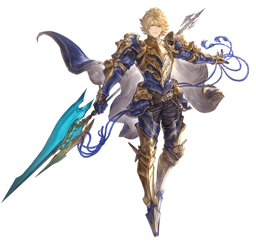

Generating prompts:   0%|          | 1/223 [00:33<2:02:23, 33.08s/it]

a woman in a red dress sitting on a balcony, by Zou Zhe, shutterstock contest winner, travel ad, instagram photo amazing view, narrow and winding cozy streets, boho chic!!, shot on anamorphic lenses, unsplash photography, architectural digest!!!, long weaving brown hair, stone roof, very beautiful digital art, chinese village, woman with hat


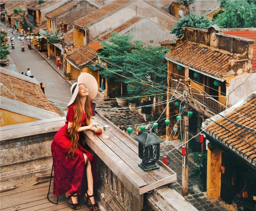

Generating prompts:   1%|          | 2/223 [01:17<2:26:17, 39.72s/it]

a mascot of a wolf with a baseball cap, computer art, concept tattoo design, strong red hue, wwe, stream, no watermark signature, grey hoodie opened, high detailed photography red, hardcore techno, mullet, #


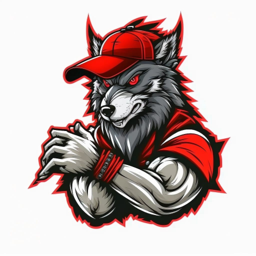

Generating prompts:   1%|▏         | 3/223 [01:55<2:22:53, 38.97s/it]

a wallet sitting on top of a table next to a potted plant, by Master of the Embroidered Foliage, unsplash photography, rustic yet enormous scp (secure, elize theron, insanely highly detailed artwork, fabulous illustrations, plants on pots and on the walls, enamel, masculine and rugged, plants


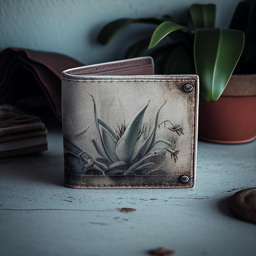

Generating prompts:   2%|▏         | 4/223 [02:32<2:19:25, 38.20s/it]

a brown backpack sitting on top of a wooden table, by Christian Hilfgott Brand, behance contest winner, arts and crafts movement, dressed in biker leather, very realistic. low dark light, wlop : :


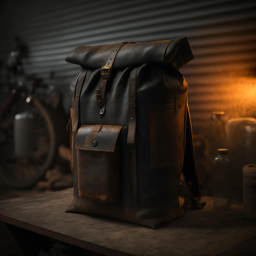

Generating prompts:   2%|▏         | 5/223 [02:50<1:52:49, 31.05s/it]

a woman in a kimono with a flower in her hair, a detailed painting, pixiv contest winner, cute anthropomorphic bunny, red jewelry, with ancient chinese aesthetic, popular south korean makeup, headshot of young female furry, in icon style, big ears, whitebangsblackhair, anime still image


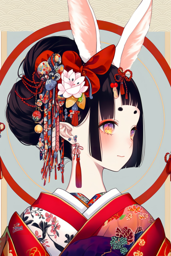

Generating prompts:   3%|▎         | 6/223 [03:28<1:59:48, 33.13s/it]

a painting of a castle with a plane flying over it, by Tim Hildebrandt, 2 0 1 9 anime, listing image, boxart, a painting of white silver, dreaming about a faraway place, key anime visual, adam lee and walt disney, in this painting, krenzcushart, early cgi, shikishi, non binary future world, akira toriyama studio ghibli


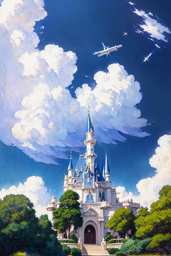

Generating prompts:   3%|▎         | 7/223 [04:13<2:13:29, 37.08s/it]

a painting with lots of circles on it, by Howardena Pindell, behance contest winner, metaphysical painting, jewel fishes


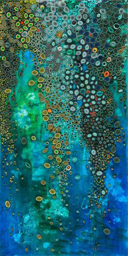

Generating prompts:   4%|▎         | 8/223 [04:25<1:45:00, 29.31s/it]

a painting of a person swimming in a body of water, an oil painting, by amano, metaphysical painting, pixar disney, krakens


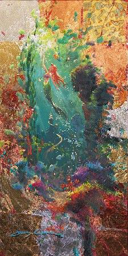

Generating prompts:   4%|▍         | 9/223 [04:41<1:29:34, 25.11s/it]

a couple of cars that are parked in front of a building, a detailed matte painting, by Vincent Lefevre, luxurious theme, inside an gothic dystopian, real pianos, digital rain, dark paradise, storefronts, like lady mechanika, architectural render, paris hotel style, identical picture, diptych


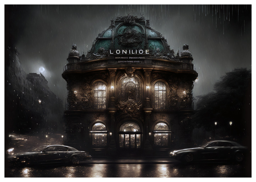

Generating prompts:   4%|▍         | 10/223 [05:23<1:47:21, 30.24s/it]

a close up of a badge with a star on it, concept art, inspired by Rafail Levitsky, rebel, red tank top and wide blue pants, lineage 2 revolution style, rounded logo, lostfish, irelia, 2 0 7 7, listing image, discarded scrolls, status icons, albion


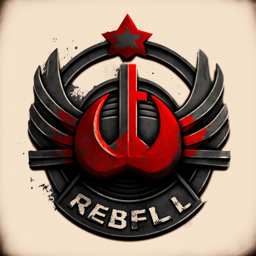

Generating prompts:   5%|▍         | 11/223 [06:04<1:58:35, 33.56s/it]

a large building with a bird flying in front of it, a detailed matte painting, inspired by Lise Deharme, gothic art, black dress : : symmetrical face, the great door of hell, complex and desaturated, in their noble mansion, monochromatic colour palette, houzz, beautiful gemini good and evil, architectural digest photo, art contest winner on behance


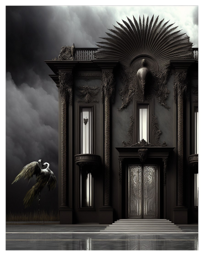

Generating prompts:   5%|▌         | 12/223 [06:39<1:59:03, 33.85s/it]

a close up of a statue of a person with a skull on it's head, cyberpunk art, cgsociety, gothic art, ( h. r. giger ), pc boxart, interconnected human lifeforms, picture of a female biker, benevolent android necromancer, beksisnski, portrait of an insectoid, fractal ceramic armor


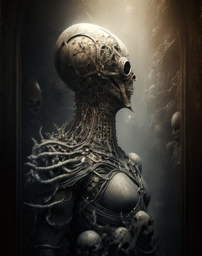

Generating prompts:   6%|▌         | 13/223 [07:13<1:58:59, 34.00s/it]

a woman dressed in armor holding a flag, by Magali Villeneuve, featured on cgsociety, transylvania, riften, official character art, maia sandu hyperrealistic, crimson and ecru color scheme, dressed as a queen, in dunwall, card art, nationalist


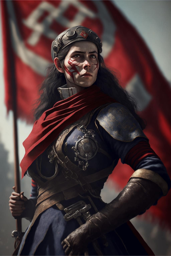

Generating prompts:   6%|▋         | 14/223 [07:49<2:00:13, 34.52s/it]

a group of sharks swimming next to a boat, poster art, by Igor Morski, octane render : :, hunted


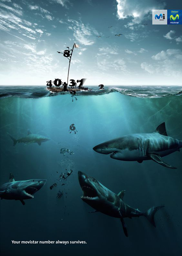

Generating prompts:   7%|▋         | 15/223 [08:05<1:41:02, 29.15s/it]

a close up of a person on a skateboard, a character portrait, inspired by John Laviers Wheatley, deviantart contest winner, cobra, looking like a bird, flight suit and gloves, male drow, futuristic spy, only five fingers, wearing dark blue suit, new vegas style, full body sarcastic pose, discord mod, loundraw, very fashion, rat


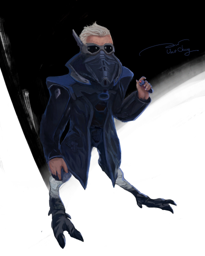

Generating prompts:   7%|▋         | 16/223 [08:51<1:57:09, 33.96s/it]

a person in a hoodie standing in front of a city, cyberpunk art, les automatistes, discord profile picture, colourful lighting, vp of marketing, with full descriptions, view is centered on the robot, hacking, featured, propganda poster, yautja, malicious


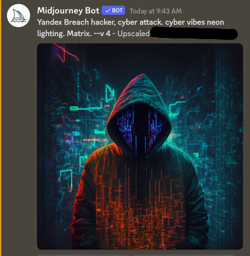

Generating prompts:   8%|▊         | 17/223 [09:29<2:01:32, 35.40s/it]

a group of monkeys standing next to each other, concept art, cgsociety, donald trump as the pope, esao andrews : : ornate, with an armor and a crown, underworld boss, standing in a church, screenshot from the game, ability image, promotional image


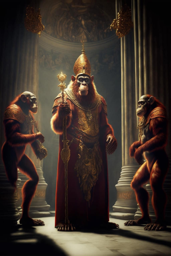

Generating prompts:   8%|▊         | 18/223 [10:18<1:57:26, 34.37s/it]


KeyboardInterrupt: ignored

In [4]:
#@title Batch process a folder of images 📁 -> 📝

#@markdown This will generate prompts for every image in a folder and either save results 
#@markdown to a desc.csv file in the same folder or rename the files to contain their prompts.
#@markdown The renamed files work well for [DreamBooth extension](https://github.com/d8ahazard/sd_dreambooth_extension)
#@markdown in the [Stable Diffusion Web UI](https://github.com/AUTOMATIC1111/stable-diffusion-webui).
#@markdown You can use the generated csv in the [Stable Diffusion Finetuning](https://colab.research.google.com/drive/1vrh_MUSaAMaC5tsLWDxkFILKJ790Z4Bl?usp=sharing)

import csv
import os
from IPython.display import clear_output, display
from PIL import Image
from tqdm import tqdm

folder_path = "/content/my_images" #@param {type:"string"}
prompt_mode = 'best' #@param ["best","fast"]
output_mode = 'rename' #@param ["desc.csv","rename"]
max_filename_len = 128 #@param {type:"integer"}
best_max_flavors = 16 #@param {type:"integer"}


def sanitize_for_filename(prompt: str, max_len: int) -> str:
    name = "".join(c for c in prompt if (c.isalnum() or c in ",._-! "))
    name = name.strip()[:(max_len-4)] # extra space for extension
    return name

ci.config.quiet = True

files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')] if os.path.exists(folder_path) else []
prompts = []
for idx, file in enumerate(tqdm(files, desc='Generating prompts')):
    if idx > 0 and idx % 100 == 0:
        clear_output(wait=True)

    image = Image.open(os.path.join(folder_path, file)).convert('RGB')
    prompt = inference(image, prompt_mode, best_max_flavors=best_max_flavors)
    prompts.append(prompt)

    print(prompt)
    thumb = image.copy()
    thumb.thumbnail([256, 256])
    display(thumb)

    if output_mode == 'rename':
        name = sanitize_for_filename(prompt, max_filename_len)
        ext = os.path.splitext(file)[1]
        filename = name + ext
        idx = 1
        while os.path.exists(os.path.join(folder_path, filename)):
            print(f'File {filename} already exists, trying {idx+1}...')
            filename = f"{name}_{idx}{ext}"
            idx += 1
        os.rename(os.path.join(folder_path, file), os.path.join(folder_path, filename))

if len(prompts):
    if output_mode == 'desc.csv':
        csv_path = os.path.join(folder_path, 'desc.csv')
        with open(csv_path, 'w', encoding='utf-8', newline='') as f:
            w = csv.writer(f, quoting=csv.QUOTE_MINIMAL)
            w.writerow(['image', 'prompt'])
            for file, prompt in zip(files, prompts):
                w.writerow([file, prompt])

        print(f"\n\n\n\nGenerated {len(prompts)} prompts and saved to {csv_path}, enjoy!")
    else:
        print(f"\n\n\n\nGenerated {len(prompts)} prompts and renamed your files, enjoy!")
else:
    print(f"Sorry, I couldn't find any images in {folder_path}")
